<a href="https://colab.research.google.com/github/marquito3012/TFG/blob/main/FineTuningActionDetectionAndClassificationYolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
!pip install -q supervision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.0 MB/s eta 0:00:00


In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install -q roboflow

from google.colab import userdata
from roboflow import Roboflow

import os

rf = Roboflow(api_key="9KG8ovuhVxeymK6aMBor")
project = rf.workspace("uni-mallw").project("drowsy-detection-qnv9b")
version = project.version(3)
dataset = version.download("yolov11")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Drowsy-Detection-3 in yolov11:: 100%|██████████| 3605/3605 [00:00<00:00, 4696.71it/s]


In [5]:
from ultralytics import YOLO
%cd {HOME}

model = YOLO("yolo11n.pt")

train_results = model.train(
    data = f"{dataset.location}/data.yaml",
    epochs = 15,
    batch = 32,
    plots = True)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
/content


100%|██████████| 5.35M/5.35M [00:00<00:00, 288MB/s]


Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/datasets/Drowsy-Detection-3/data.yaml, epochs=15, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 99.9MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/datasets/Drowsy-Detection-3/train/labels... 1259 images, 3 backgrounds, 0 corrupt: 100%|██████████| 1259/1259 [00:00<00:00, 2349.85it/s]

train: New cache created: /content/datasets/Drowsy-Detection-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/Drowsy-Detection-3/valid/labels... 539 images, 1 backgrounds, 0 corrupt: 100%|██████████| 539/539 [00:00<00:00, 941.82it/s]


val: New cache created: /content/datasets/Drowsy-Detection-3/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      4.72G      1.689      3.114      1.848         21        640: 100%|██████████| 40/40 [00:25<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.07s/it]

                   all        539        538    0.00342          1      0.454      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      4.66G      1.561      2.254       1.62         15        640: 100%|██████████| 40/40 [00:21<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.05it/s]

                   all        539        538      0.587      0.755      0.672      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      4.67G      1.543      1.901      1.594         26        640: 100%|██████████| 40/40 [00:22<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]


                   all        539        538      0.455      0.658      0.586      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      4.67G      1.578      1.734      1.612         25        640: 100%|██████████| 40/40 [00:25<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.41it/s]

                   all        539        538      0.627      0.868      0.778      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      4.67G      1.544      1.581      1.582         22        640: 100%|██████████| 40/40 [00:25<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.86it/s]

                   all        539        538      0.636      0.721      0.743      0.374


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      4.66G      1.537      1.361      1.615         11        640: 100%|██████████| 40/40 [00:24<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.28it/s]

                   all        539        538      0.791      0.789      0.852      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      4.66G      1.524      1.194      1.617         11        640: 100%|██████████| 40/40 [00:21<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.65it/s]

                   all        539        538      0.805      0.884       0.92       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      4.66G      1.521      1.115      1.626         11        640: 100%|██████████| 40/40 [00:22<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]

                   all        539        538      0.728      0.726       0.78      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      4.66G      1.517      1.046      1.587         10        640: 100%|██████████| 40/40 [00:21<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.16it/s]

                   all        539        538      0.861      0.832      0.912      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      4.66G      1.487     0.9745      1.569         11        640: 100%|██████████| 40/40 [00:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.89it/s]

                   all        539        538      0.887      0.892      0.937      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      4.66G      1.461     0.9095      1.539         11        640: 100%|██████████| 40/40 [00:23<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.92it/s]

                   all        539        538      0.885      0.872      0.946      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      4.66G      1.458     0.8849      1.543         11        640: 100%|██████████| 40/40 [00:21<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.28it/s]

                   all        539        538      0.855       0.88      0.945      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      4.66G      1.419     0.8453        1.5         11        640: 100%|██████████| 40/40 [00:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.91it/s]

                   all        539        538      0.896      0.937       0.96      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      4.66G      1.404     0.8097        1.5         11        640: 100%|██████████| 40/40 [00:27<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.65it/s]

                   all        539        538      0.915      0.907      0.964      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      4.66G      1.382     0.7762      1.472         11        640: 100%|██████████| 40/40 [00:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.31it/s]

                   all        539        538      0.931      0.913      0.971      0.576



15 epochs completed in 0.128 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.17it/s]


                   all        539        538      0.931      0.913      0.971      0.576
                 Awake        299        299      0.964      0.885      0.979        0.6
                Drowsy        239        239      0.899      0.941      0.962      0.552
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train


/content


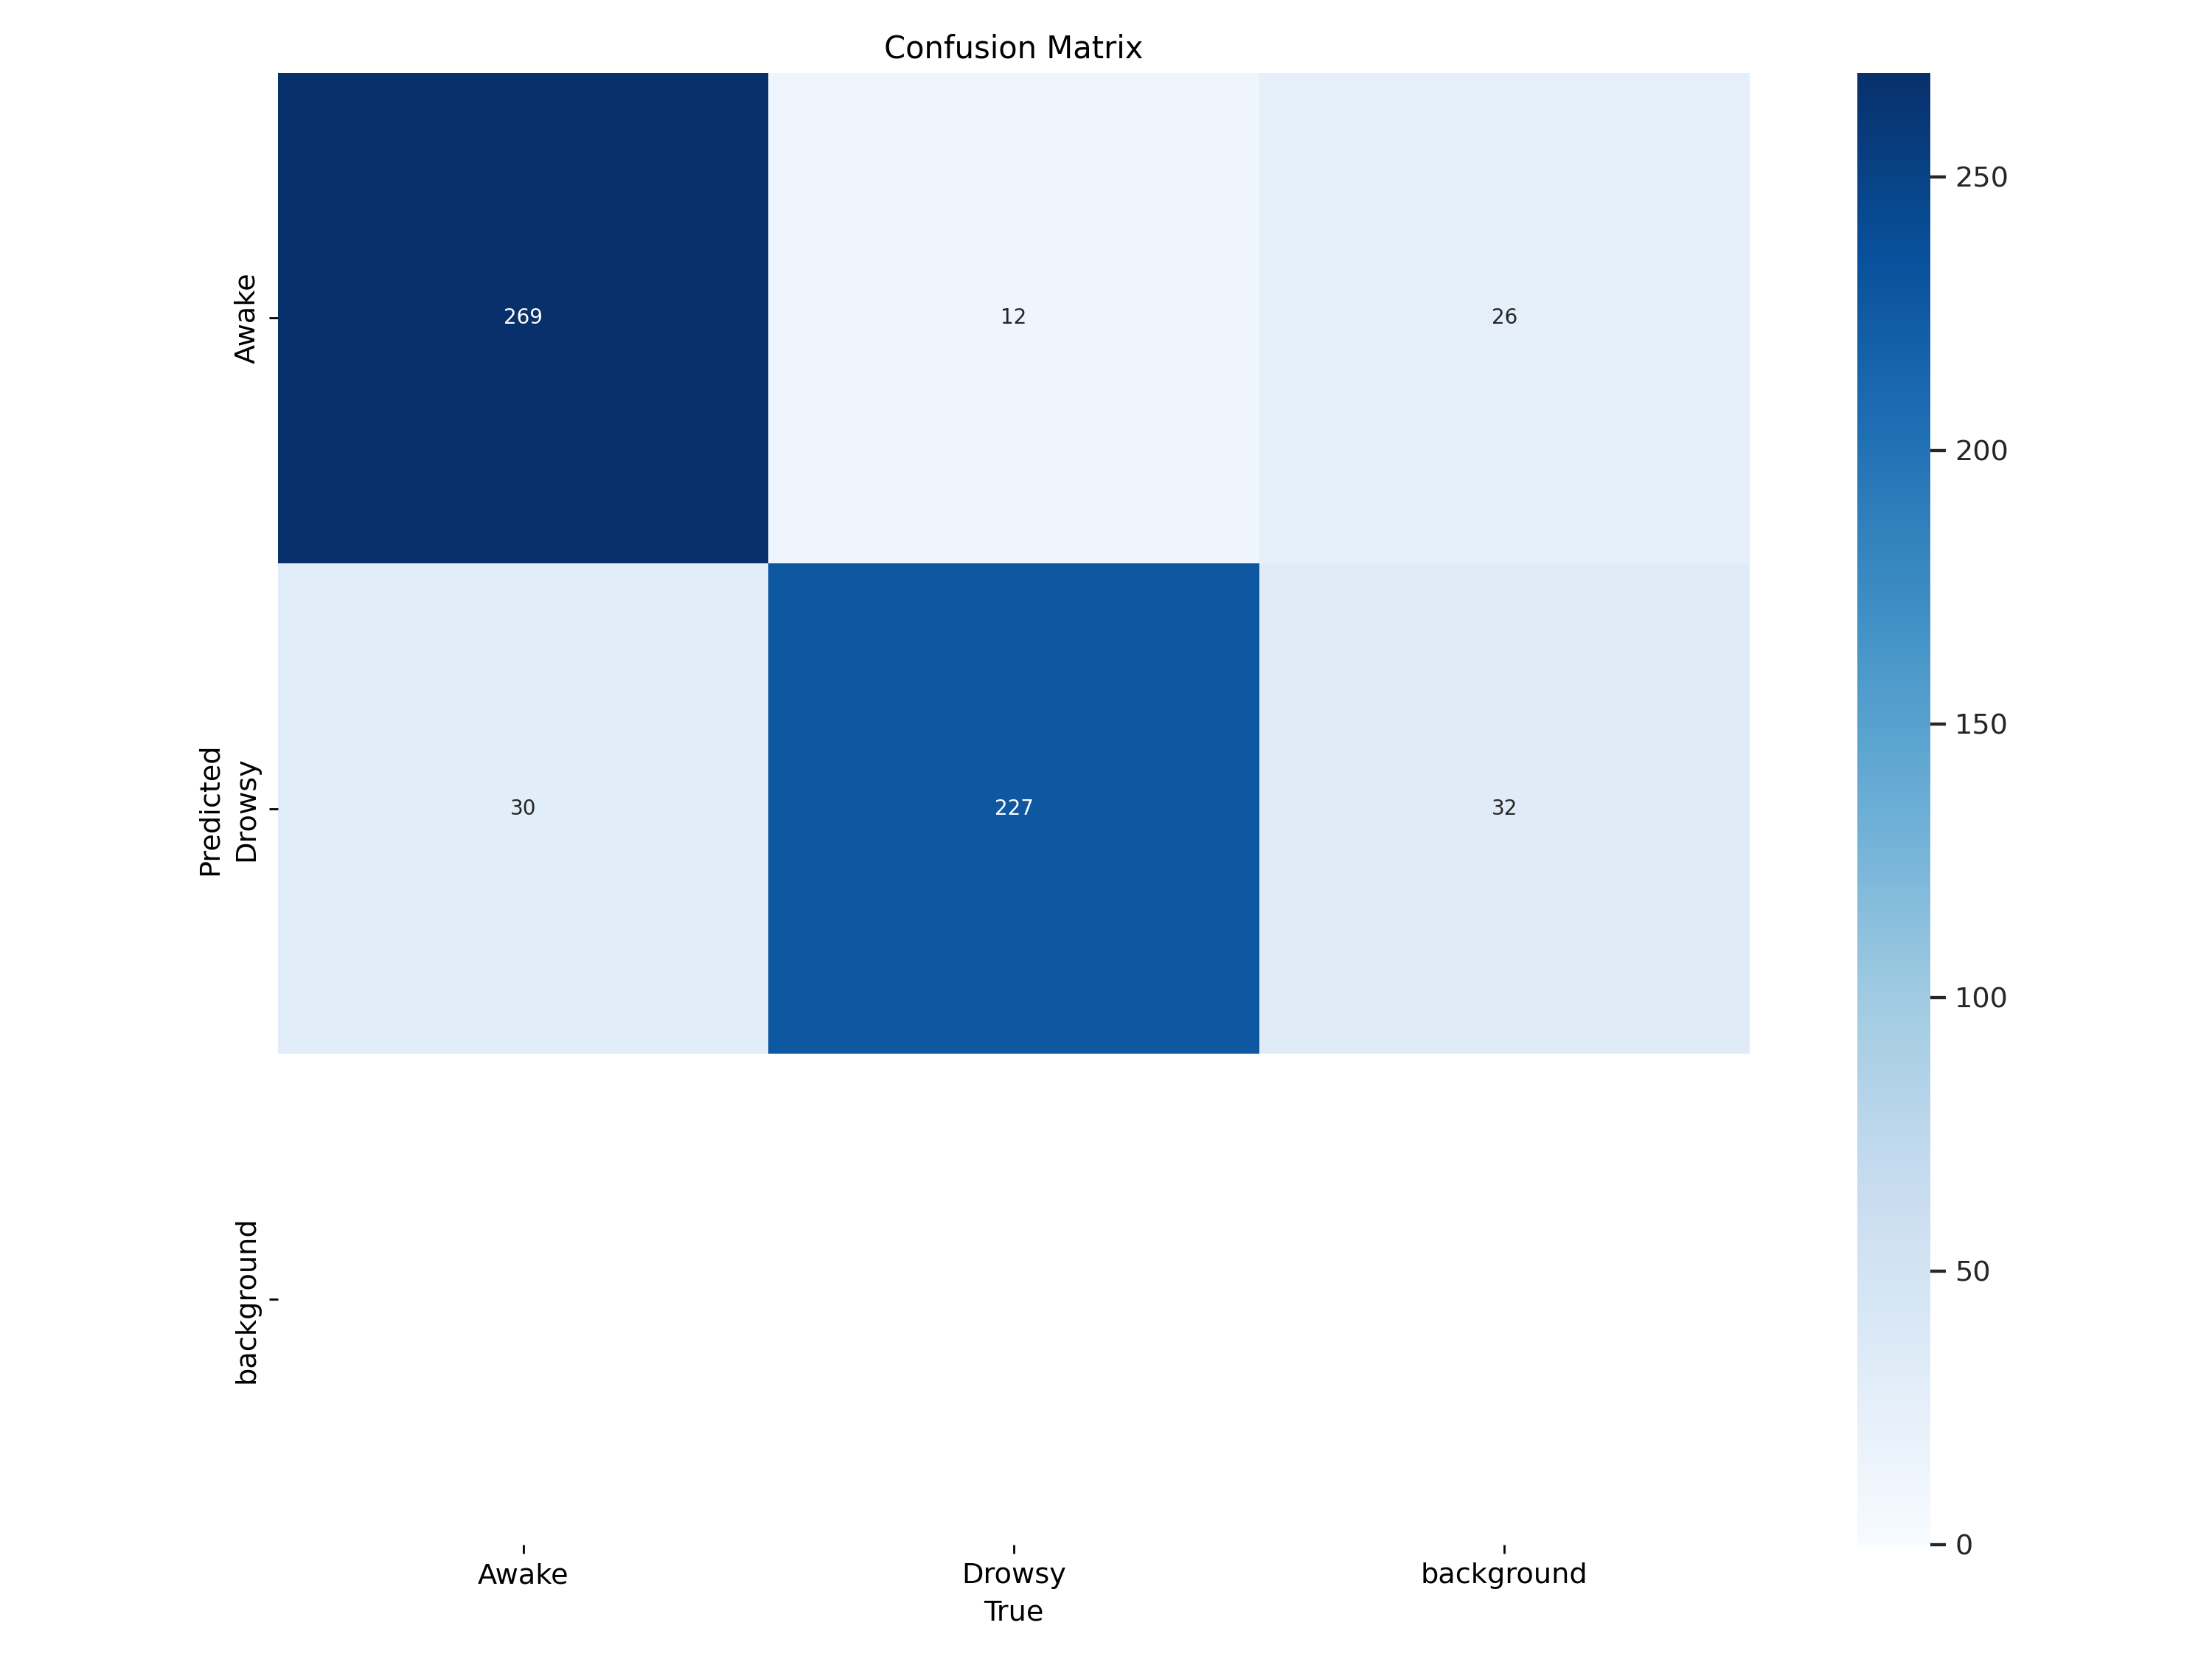

In [6]:
from IPython.display import Image, display
%cd {HOME}
Image(filename=f"{HOME}/runs/detect/train/confusion_matrix.png", width=600)

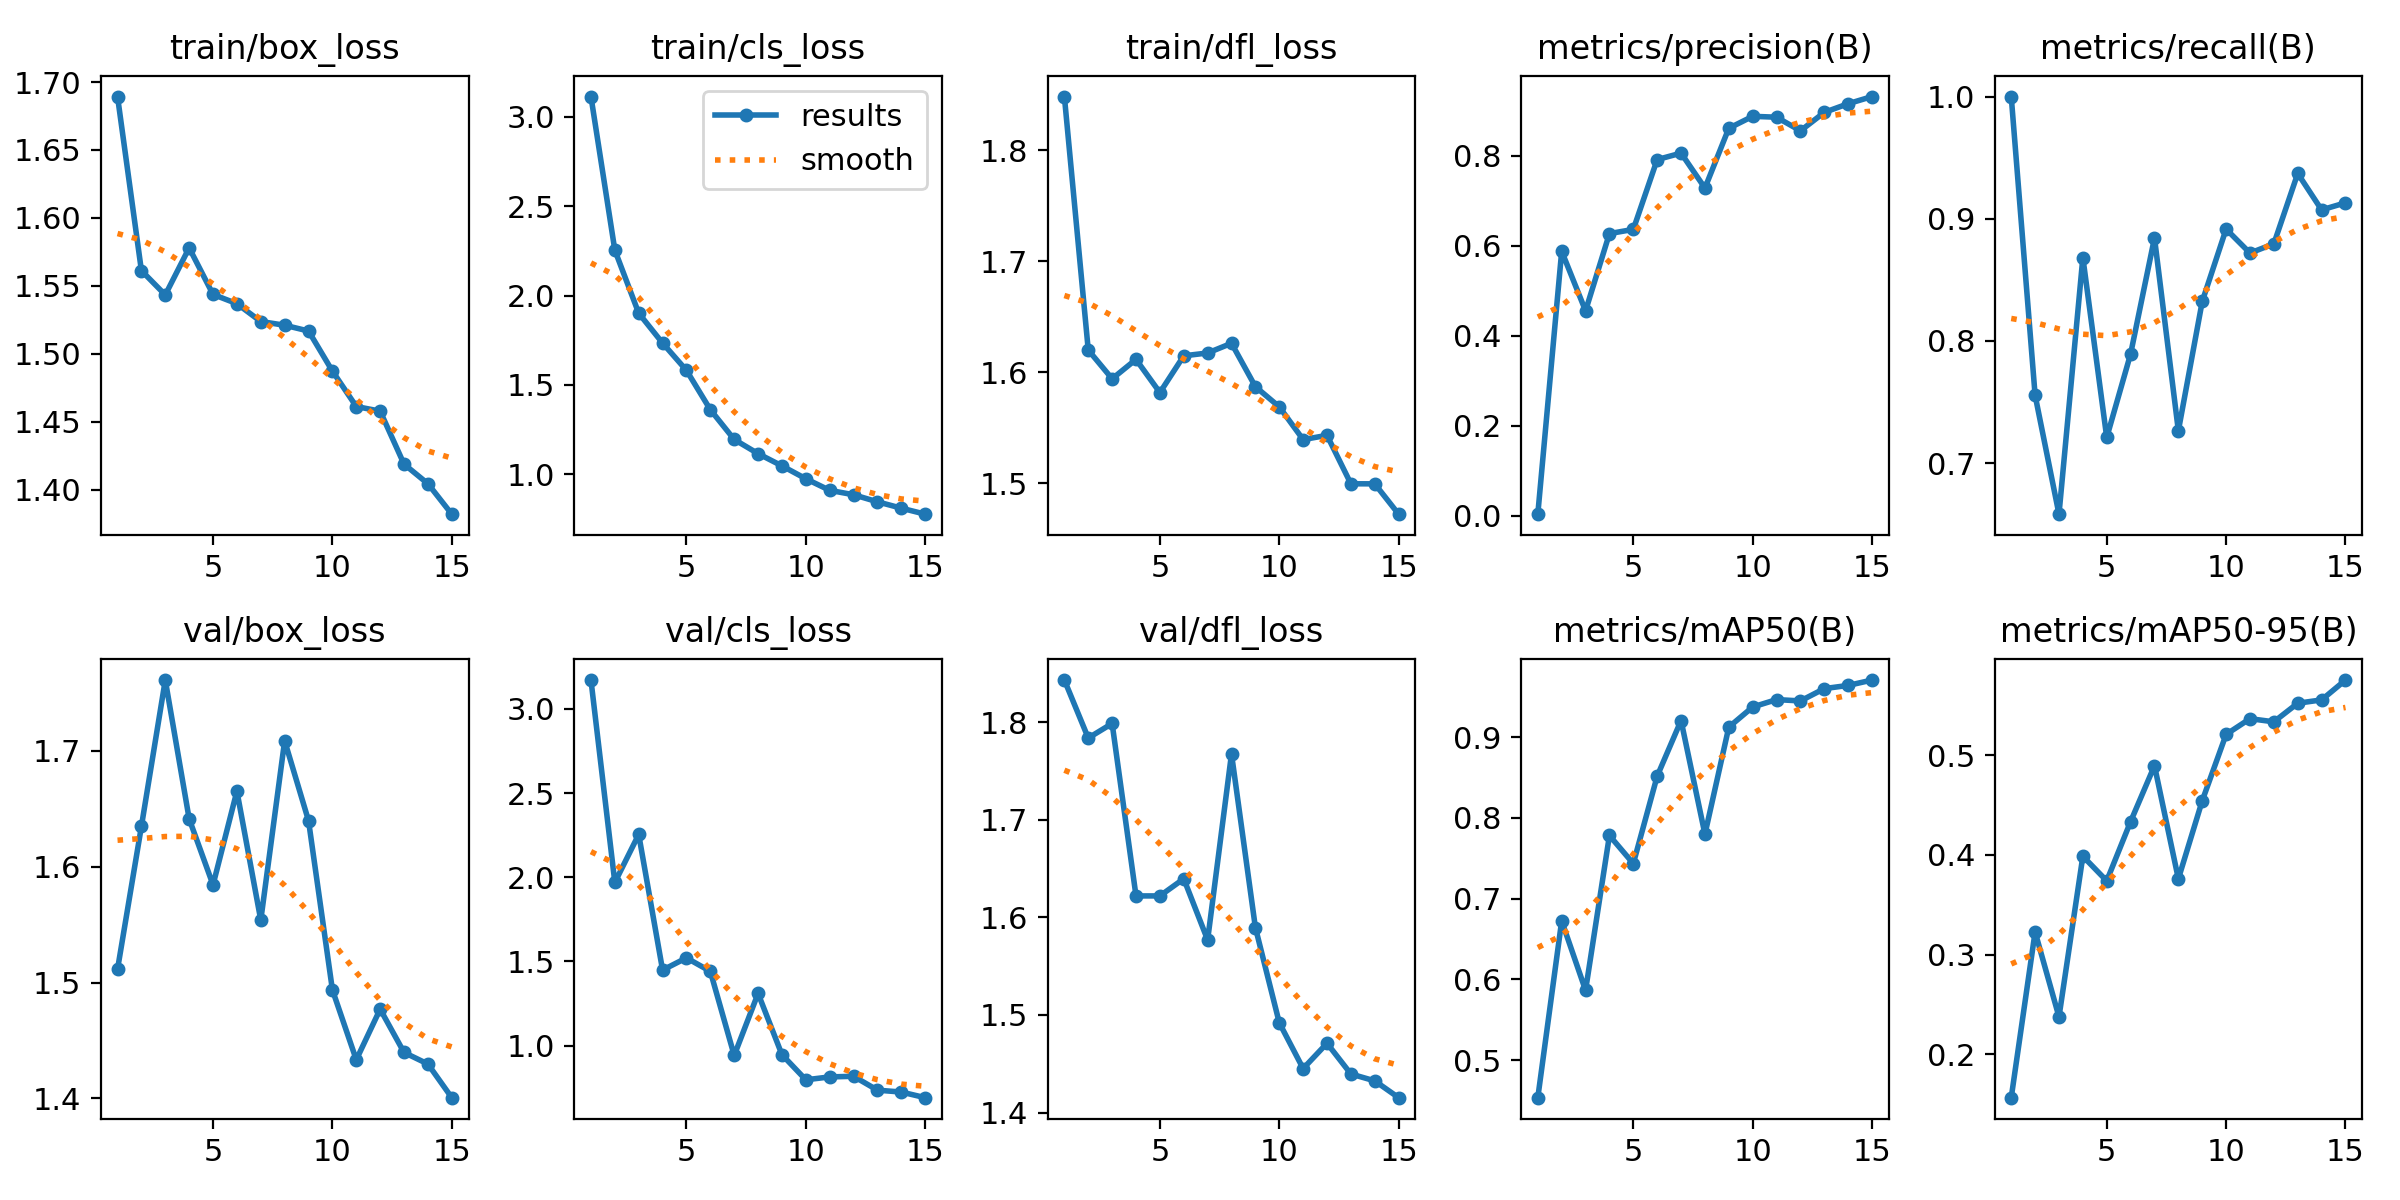

In [7]:
Image(filename=f"{HOME}/runs/detect/train/results.png", width=600)

In [8]:
from ultralytics import YOLO
import supervision as sv

model = YOLO("./runs/detect/train/weights/best.pt")

resultdataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


In [9]:
import random

random_image = random.choice(list(resultdataset.images.keys()))
random_image = resultdataset.images[random_image]

results = model(source=random_image, conf=0.20)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene = random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene = annotated_image, detections=detections)

sv.plot_image(annotated_image)

SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.


IndexError: Cannot choose from an empty sequence